In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Height Weight Data.csv')

In [5]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [6]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [16]:
df[5:7]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889


In [21]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [22]:
df.Height.mean()

69.02441087268797

In [23]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [25]:
df.shape

(3501, 2)

In [26]:
row, col = df.shape

In [27]:
row

3501

In [28]:
col

2

In [29]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height Weight Plot')

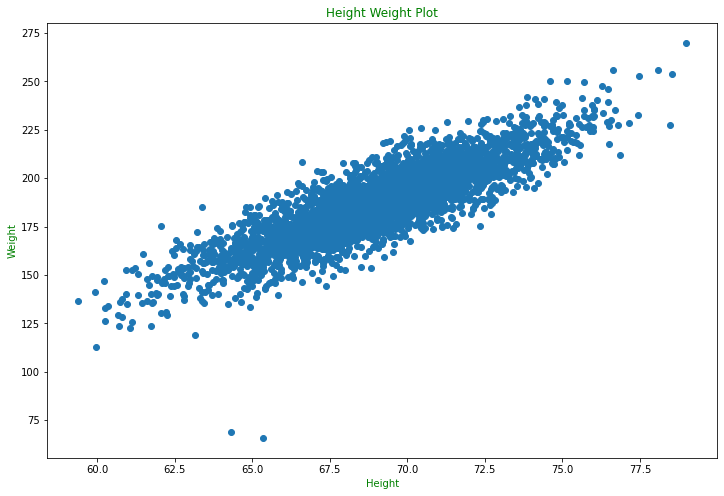

In [130]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height', color='green')
plt.ylabel('Weight', color='green')
plt.title('Height Weight Plot', color='green')

In [47]:
x = df[['Height']]
y = df['Weight']

In [48]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


# Split the dataset into train and test

In [53]:
from sklearn.model_selection import train_test_split as tts

In [55]:
# train = 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [56]:
xtrain.head()

,Height
862,70.322550
3465,68.205843
1725,68.031172
1911,67.452862
1822,69.242541


In [57]:
ytrain.head()

862     190.461777
3465    200.754488
1725    176.665353
1911    160.009409
1822    189.627852
Name: Weight, dtype: float64

# Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression

In [59]:
reg = LinearRegression()

In [60]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [64]:
m = reg.coef_
m

array([5.99755709])

In [65]:
c = reg.intercept_
c

-227.08927467467086

In [112]:
x1 = 80
y = m * x1 + c

In [113]:
y

array([252.71529292])

In [138]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[80]])

array([252.71529292])

In [115]:
pred = reg.predict(xtest)

In [103]:
pred

array([202.30452395, 200.79928496, 197.70199624, ..., 178.36155374,
       181.27181638, 193.28756475])

In [104]:
df["Predicted Result"] = reg.predict(x)

In [105]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.812426
1,68.781904,162.310473,185.434122
2,74.110105,212.740856,217.390314
3,71.730978,220.042470,203.121364
4,69.881796,206.349801,192.030786


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [107]:
mse = mean_squared_error(ytest, pred)

In [108]:
mse

106.88901930067291

In [109]:
mae = mean_absolute_error(ytest, pred)

In [110]:
mae

8.070850857759508

# Best fit line

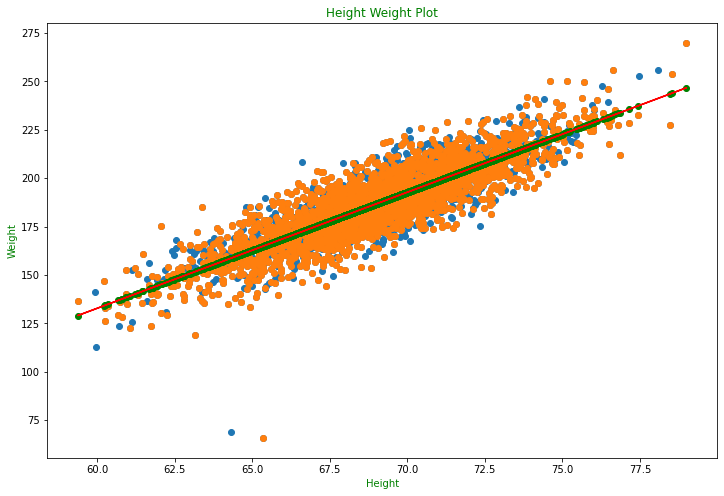

In [142]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height', color='green')
plt.ylabel('Weight', color='green')
plt.title('Height Weight Plot', color='green')
plt.plot(df.Height, reg.predict(df[['Height']]), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain,reg.predict(xtrain), color='green')

In [143]:
reg.predict([[90]])

array([312.69086387])

In [144]:
reg.score(xtest, ytest)

0.7196184962159905